## 딥러닝 영상처리
# 전이학습

### 유명한 CNN 아키텍처
- https://m.blog.naver.com/takion7/221633332572
> - LeNet
> - AlexNet
> - Inception (GoogleNet)
> - VGGNet (VGG16)
> - ResNet
> - Xception (Inception 기반)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
dir(keras.applications)

['DenseNet121',
 'DenseNet169',
 'DenseNet201',
 'EfficientNetB0',
 'EfficientNetB1',
 'EfficientNetB2',
 'EfficientNetB3',
 'EfficientNetB4',
 'EfficientNetB5',
 'EfficientNetB6',
 'EfficientNetB7',
 'InceptionResNetV2',
 'InceptionV3',
 'MobileNet',
 'MobileNetV2',
 'MobileNetV3Large',
 'MobileNetV3Small',
 'NASNetLarge',
 'NASNetMobile',
 'ResNet101',
 'ResNet101V2',
 'ResNet152',
 'ResNet152V2',
 'ResNet50',
 'ResNet50V2',
 'VGG16',
 'VGG19',
 'Xception',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'densenet',
 'efficientnet',
 'imagenet_utils',
 'inception_resnet_v2',
 'inception_v3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3',
 'nasnet',
 'resnet',
 'resnet50',
 'resnet_v2',
 'vgg16',
 'vgg19',
 'xception']

### VGG16 분류

In [6]:
help(keras.applications.vgg16.VGG16)

Help on function VGG16 in module tensorflow.python.keras.applications.vgg16:

VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, classifier_activation='softmax')
    Instantiates the VGG16 model.
    
    Reference:
    - [Very Deep Convolutional Networks for Large-Scale Image Recognition](
    https://arxiv.org/abs/1409.1556) (ICLR 2015)
    
    For image classification use cases, see
    [this page for detailed examples](
      https://keras.io/api/applications/#usage-examples-for-image-classification-models).
    
    For transfer learning use cases, make sure to read the
    [guide to transfer learning & fine-tuning](
      https://keras.io/guides/transfer_learning/).
    
    The default input size for this model is 224x224.
    
    Note: each Keras Application expects a specific kind of input preprocessing.
    For VGG16, call `tf.keras.applications.vgg16.preprocess_input` on your
    inputs before passing them to the mo

In [5]:
model = keras.applications.vgg16.VGG16(include_top=True, weights='imagenet')
    # input_shape=(224, 224, 3)
    # C:\Users\user\.keras\models\vgg16_weights_tf_dim_ordering_tf_kernels.h5

In [4]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

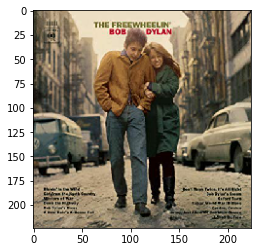

In [16]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

bob = load_img('bob_dylan.jpg', target_size=(224, 224))
bob = img_to_array(bob)
plt.imshow(bob/255.)

> skimage 사용시
```
import skimage

bob = skimage.io.imread('bob_dylan.jpg') # 0~255
bob = skimage.transform.resize(bob, (224,224)) # 0.0~1.0
skimage.io.imshow(bob)
```

In [17]:
from tensorflow.keras.applications.vgg16 import preprocess_input

input_image = np.expand_dims(bob, axis=0)
input_image = preprocess_input(input_image)

input_image.shape, input_image.max(), input_image.min()

((1, 224, 224, 3), 138.22101, -123.68)

In [18]:
result = model.predict(input_image)
result.shape

(1, 1000)

In [19]:
np.argsort(result[0])[::-1][:10]

array([675, 468, 734, 654, 569, 656, 407, 708, 561, 879], dtype=int64)

In [20]:
from tensorflow.keras.applications.vgg16 import decode_predictions

decode_predictions(result, top=10)

[[('n03796401', 'moving_van', 0.19718799),
  ('n02930766', 'cab', 0.09000346),
  ('n03977966', 'police_van', 0.06667397),
  ('n03769881', 'minibus', 0.05160552),
  ('n03417042', 'garbage_truck', 0.047403127),
  ('n03770679', 'minivan', 0.030321062),
  ('n02701002', 'ambulance', 0.026834985),
  ('n03903868', 'pedestal', 0.016716454),
  ('n03384352', 'forklift', 0.016439533),
  ('n04507155', 'umbrella', 0.015800046)]]

In [16]:
from tensorflow.keras.applications.vgg16 import decode_predictions

In [21]:
labels = [i[0][1] for i in decode_predictions(np.eye(1000), top=1)]
len(labels)

1000

In [24]:
for i in labels:
    if i.find('dog')>=0: print(i)

Maltese_dog
Old_English_sheepdog
Shetland_sheepdog
Greater_Swiss_Mountain_dog
Bernese_mountain_dog
French_bulldog
Eskimo_dog
African_hunting_dog
dogsled
hotdog


- 중간층 출력이미지 확인

In [13]:
for i,layer in enumerate(model.layers):
    print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 flatten
20 fc1
21 fc2
22 predictions


In [36]:
#block3_conv1 = vgg16.get_layer('block3_conv1')
activation_model = keras.models.Model(inputs=model.input,
                        outputs=model.layers[7].output) # block3_conv1

In [37]:
result = activation_model.predict(input_image)
result.shape

(1, 56, 56, 256)

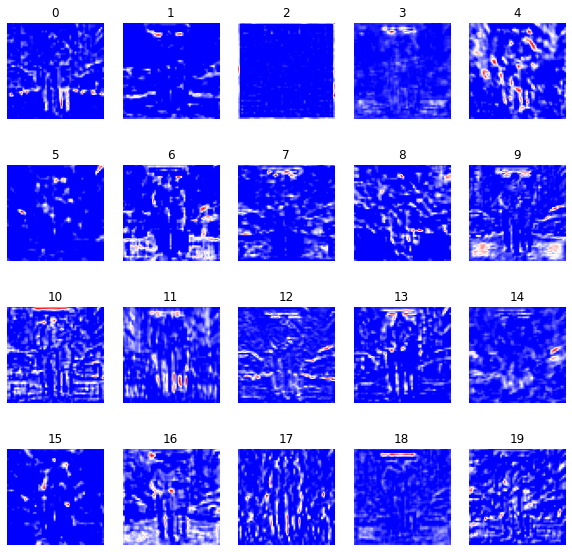

In [38]:
plt.figure(figsize=[10,10])

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(result[0,:,:,i], cmap='bwr')
    plt.axis('off')
    plt.title(i)

### VGG16 전이학습

In [2]:
vgg16 = keras.applications.vgg16.VGG16(include_top=False, weights='imagenet',
                            input_shape=(150,150,3))

In [40]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

- 이미지 파일 변환

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
datagen = ImageDataGenerator(rescale=1/255)

generator = datagen.flow_from_directory('cats_and_dogs_small/train',
                    target_size=(150,150), batch_size=20, class_mode='binary')

X_train = np.zeros([2000,4,4,512])
y_train = np.zeros(2000)

for step in range(100): # 2000//20
    X_batch, y_batch = generator.next()
    pred = vgg16.predict(X_batch)
    
    X_train[20*step:20*(step+1)] = pred
    y_train[20*step:20*(step+1)] = y_batch
    print('.', end='')
    
X_train.shape, y_train.shape

Found 2000 images belonging to 2 classes.
....................................................................................................

((2000, 4, 4, 512), (2000,))

- 변환된 이미지파일 저장

In [43]:
np.savez('cats_and_dogs_vgg.npz', x=X_train, y=y_train)

In [3]:
npzfile = np.load('cats_and_dogs_vgg.npz')
npzfile.files

['x', 'y']

In [4]:
npzfile['x'].shape, npzfile['y'].shape

((2000, 4, 4, 512), (2000,))

In [8]:
X_train = npzfile['x']
y_train = npzfile['y']

- 모델 훈련

In [59]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(4,4,512)))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [60]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [61]:
history = model.fit(X_train, y_train, epochs=30, batch_size=256,
                   validation_split=0.2)

Epoch 1/30
7/7 [==============================] - 1s 34ms/step - loss: 0.7788 - acc: 0.5550 - val_loss: 0.6577 - val_acc: 0.6575
Epoch 2/30
7/7 [==============================] - 0s 18ms/step - loss: 0.6211 - acc: 0.6375 - val_loss: 0.5645 - val_acc: 0.7800
Epoch 3/30
7/7 [==============================] - 0s 20ms/step - loss: 0.5370 - acc: 0.7594 - val_loss: 0.4117 - val_acc: 0.8325
Epoch 4/30
7/7 [==============================] - 0s 19ms/step - loss: 0.4544 - acc: 0.7825 - val_loss: 0.3520 - val_acc: 0.8475
Epoch 5/30
7/7 [==============================] - 0s 17ms/step - loss: 0.3628 - acc: 0.8456 - val_loss: 0.3387 - val_acc: 0.8375
Epoch 6/30
7/7 [==============================] - 0s 17ms/step - loss: 0.3192 - acc: 0.8631 - val_loss: 0.3027 - val_acc: 0.8575
Epoch 7/30
7/7 [==============================] - 0s 16ms/step - loss: 0.2827 - acc: 0.8831 - val_loss: 0.2955 - val_acc: 0.8650
Epoch 8/30
7/7 [==============================] - 0s 18ms/step - loss: 0.2634 - acc: 0.8956 - val

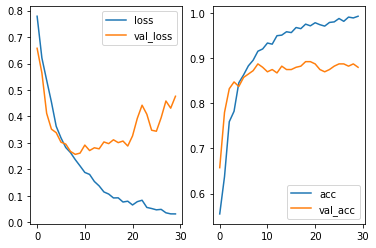

In [62]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

### Inception

In [3]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, decode_predictions

In [64]:
base_model = InceptionV3(weights='imagenet', include_top=True)

In [65]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [66]:
for i,layer in enumerate(base_model.layers):
    print(i, layer.name, layer.output_shape)

0 input_2 [(None, 299, 299, 3)]
1 conv2d (None, 149, 149, 32)
2 batch_normalization (None, 149, 149, 32)
3 activation (None, 149, 149, 32)
4 conv2d_1 (None, 147, 147, 32)
5 batch_normalization_1 (None, 147, 147, 32)
6 activation_1 (None, 147, 147, 32)
7 conv2d_2 (None, 147, 147, 64)
8 batch_normalization_2 (None, 147, 147, 64)
9 activation_2 (None, 147, 147, 64)
10 max_pooling2d (None, 73, 73, 64)
11 conv2d_3 (None, 73, 73, 80)
12 batch_normalization_3 (None, 73, 73, 80)
13 activation_3 (None, 73, 73, 80)
14 conv2d_4 (None, 71, 71, 192)
15 batch_normalization_4 (None, 71, 71, 192)
16 activation_4 (None, 71, 71, 192)
17 max_pooling2d_1 (None, 35, 35, 192)
18 conv2d_8 (None, 35, 35, 64)
19 batch_normalization_8 (None, 35, 35, 64)
20 activation_8 (None, 35, 35, 64)
21 conv2d_6 (None, 35, 35, 48)
22 conv2d_9 (None, 35, 35, 96)
23 batch_normalization_6 (None, 35, 35, 48)
24 batch_normalization_9 (None, 35, 35, 96)
25 activation_6 (None, 35, 35, 48)
26 activation_9 (None, 35, 35, 96)
27 aver

In [68]:
base_model.get_layer('input_2').output_shape

[(None, 299, 299, 3)]

- Inception-v3 의 입력이미지는 299x299x3 이고,
- -1 ~ 1 사이의 실수값으로 전처리한다

In [69]:
img = keras.preprocessing.image.load_img('bob_dylan.jpg', target_size=(299,299))
bob = keras.preprocessing.image.img_to_array(img)
bob = ((bob/255.)-0.5)*2

In [70]:
bob.shape, bob.max(), bob.min(), bob.dtype

((299, 299, 3), 1.0, -1.0, dtype('float32'))

In [71]:
out = base_model.predict(bob.reshape(1,299,299,3))

In [72]:
out.argmax(axis=1)

array([608], dtype=int64)

In [73]:
decode_predictions(out, top=10)

[[('n03594734', 'jean', 0.12155974),
  ('n03404251', 'fur_coat', 0.10070072),
  ('n02992529', 'cellular_telephone', 0.05656003),
  ('n02667093', 'abaya', 0.04886628),
  ('n02971356', 'carton', 0.03078817),
  ('n02930766', 'cab', 0.025535598),
  ('n04350905', 'suit', 0.02405015),
  ('n02672831', 'accordion', 0.017367443),
  ('n03110669', 'cornet', 0.016537193),
  ('n04356056', 'sunglasses', 0.016068151)]]

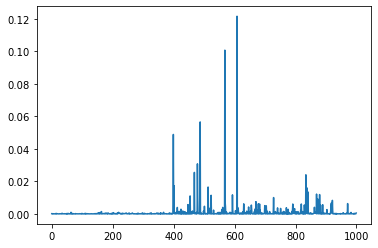

In [74]:
plt.plot(out.ravel())

- 모델 훈련

In [4]:
base_model = InceptionV3(weights='imagenet', include_top=False,
                        input_shape=(299,299,3))

In [5]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [6]:
for i,layer in enumerate(base_model.layers):
    print(i, layer.name, layer.output_shape)

0 input_1 [(None, 299, 299, 3)]
1 conv2d (None, 149, 149, 32)
2 batch_normalization (None, 149, 149, 32)
3 activation (None, 149, 149, 32)
4 conv2d_1 (None, 147, 147, 32)
5 batch_normalization_1 (None, 147, 147, 32)
6 activation_1 (None, 147, 147, 32)
7 conv2d_2 (None, 147, 147, 64)
8 batch_normalization_2 (None, 147, 147, 64)
9 activation_2 (None, 147, 147, 64)
10 max_pooling2d (None, 73, 73, 64)
11 conv2d_3 (None, 73, 73, 80)
12 batch_normalization_3 (None, 73, 73, 80)
13 activation_3 (None, 73, 73, 80)
14 conv2d_4 (None, 71, 71, 192)
15 batch_normalization_4 (None, 71, 71, 192)
16 activation_4 (None, 71, 71, 192)
17 max_pooling2d_1 (None, 35, 35, 192)
18 conv2d_8 (None, 35, 35, 64)
19 batch_normalization_8 (None, 35, 35, 64)
20 activation_8 (None, 35, 35, 64)
21 conv2d_6 (None, 35, 35, 48)
22 conv2d_9 (None, 35, 35, 96)
23 batch_normalization_6 (None, 35, 35, 48)
24 batch_normalization_9 (None, 35, 35, 96)
25 activation_6 (None, 35, 35, 48)
26 activation_9 (None, 35, 35, 96)
27 aver

263 conv2d_76 (None, 8, 8, 320)
264 batch_normalization_78 (None, 8, 8, 384)
265 batch_normalization_79 (None, 8, 8, 384)
266 batch_normalization_82 (None, 8, 8, 384)
267 batch_normalization_83 (None, 8, 8, 384)
268 conv2d_84 (None, 8, 8, 192)
269 batch_normalization_76 (None, 8, 8, 320)
270 activation_78 (None, 8, 8, 384)
271 activation_79 (None, 8, 8, 384)
272 activation_82 (None, 8, 8, 384)
273 activation_83 (None, 8, 8, 384)
274 batch_normalization_84 (None, 8, 8, 192)
275 activation_76 (None, 8, 8, 320)
276 mixed9_0 (None, 8, 8, 768)
277 concatenate (None, 8, 8, 768)
278 activation_84 (None, 8, 8, 192)
279 mixed9 (None, 8, 8, 2048)
280 conv2d_89 (None, 8, 8, 448)
281 batch_normalization_89 (None, 8, 8, 448)
282 activation_89 (None, 8, 8, 448)
283 conv2d_86 (None, 8, 8, 384)
284 conv2d_90 (None, 8, 8, 384)
285 batch_normalization_86 (None, 8, 8, 384)
286 batch_normalization_90 (None, 8, 8, 384)
287 activation_86 (None, 8, 8, 384)
288 activation_90 (None, 8, 8, 384)
289 conv2d_87 (N

In [7]:
base_model.trainable = False

x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(256, activation='relu')(x)
predictions = keras.layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs=base_model.input, outputs=predictions)

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=0.0001),
              metrics=['acc'])

d:\Anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [10]:
train_datagen = ImageDataGenerator(rescale=1/255.)
# train_datagen = ImageDataGenerator(rescale=1/255.,
#    preprocessing_function=lambda x: (x-0.5)*2.)

train_generator = train_datagen.flow_from_directory(
    'cats_and_dogs_small/train',
    target_size=(299,299),
    batch_size=20,
    class_mode='binary') # categorical, sparse(정수레이블), binary, input(입력이미지)

Found 2000 images belonging to 2 classes.


In [11]:
validation_datagen = ImageDataGenerator(rescale=1/255.)

validation_generator = train_datagen.flow_from_directory(
    'cats_and_dogs_small/validation',
    target_size=(299,299),
    batch_size=20,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [12]:
history = model.fit_generator(train_generator, epochs=10, steps_per_epoch=100,
                validation_data=validation_generator, validation_steps=50)

d:\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 63s 526ms/step - loss: 0.1228 - acc: 0.9695 - val_loss: 0.0479 - val_acc: 0.9920
Epoch 2/10
100/100 [==============================] - 52s 517ms/step - loss: 0.0317 - acc: 0.9920 - val_loss: 0.0217 - val_acc: 0.9950
Epoch 3/10
100/100 [==============================] - 53s 527ms/step - loss: 0.0180 - acc: 0.9945 - val_loss: 0.0209 - val_acc: 0.9960
Epoch 4/10
100/100 [==============================] - 53s 535ms/step - loss: 0.0127 - acc: 0.9970 - val_loss: 0.0157 - val_acc: 0.9960
Epoch 5/10
100/100 [==============================] - 53s 535ms/step - loss: 0.0096 - acc: 0.9980 - val_loss: 0.0145 - val_acc: 0.9940
Epoch 6/10
100/100 [==============================] - 52s 520ms/step - loss: 0.0066 - acc: 0.9990 - val_loss: 0.0158 - val_acc: 0.9940
Epoch 7/10
100/100 [==============================] - 52s 521ms/step - loss: 0.0051 - acc: 0.9990 - val_loss: 0.0157 - val_acc: 0.9940
Epoch 8/10
100/100 [==============================] - 5

> 적용 사례
```
Epoch 1/10
100/100 [==============================] - 63s 526ms/step - loss: 0.1228 - acc: 0.9695 - val_loss: 0.0479 - val_acc: 0.9920
Epoch 2/10
100/100 [==============================] - 52s 517ms/step - loss: 0.0317 - acc: 0.9920 - val_loss: 0.0217 - val_acc: 0.9950
Epoch 3/10
100/100 [==============================] - 53s 527ms/step - loss: 0.0180 - acc: 0.9945 - val_loss: 0.0209 - val_acc: 0.9960
Epoch 4/10
100/100 [==============================] - 53s 535ms/step - loss: 0.0127 - acc: 0.9970 - val_loss: 0.0157 - val_acc: 0.9960
Epoch 5/10
100/100 [==============================] - 53s 535ms/step - loss: 0.0096 - acc: 0.9980 - val_loss: 0.0145 - val_acc: 0.9940
Epoch 6/10
100/100 [==============================] - 52s 520ms/step - loss: 0.0066 - acc: 0.9990 - val_loss: 0.0158 - val_acc: 0.9940
Epoch 7/10
100/100 [==============================] - 52s 521ms/step - loss: 0.0051 - acc: 0.9990 - val_loss: 0.0157 - val_acc: 0.9940
Epoch 8/10
100/100 [==============================] - 52s 523ms/step - loss: 0.0042 - acc: 0.9995 - val_loss: 0.0228 - val_acc: 0.9920
Epoch 9/10
100/100 [==============================] - 52s 524ms/step - loss: 0.0031 - acc: 0.9995 - val_loss: 0.0146 - val_acc: 0.9950
Epoch 10/10
100/100 [==============================] - 52s 523ms/step - loss: 0.0025 - acc: 0.9990 - val_loss: 0.0151 - val_acc: 0.9940
```

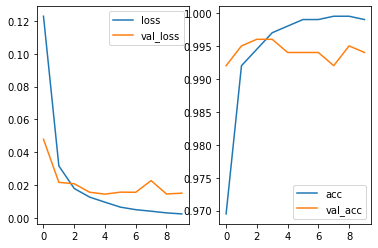

In [13]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])